In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.utils import resample
from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
sns.set()
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score,plot_confusion_matrix, roc_curve, auc
from pandas_profiling import ProfileReport

%matplotlib notebook
%matplotlib inline

ModuleNotFoundError: No module named 'imblearn'

In [25]:
import nltk
import nltk.corpus
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly as px
plt.style.use('fivethirtyeight')
%matplotlib inline
#from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer



In [3]:
df = pd.read_csv(r'C:/Users/Sindhuja_reddy/OneDrive/Desktop/Jupy/drugsComTest_raw.csv')


In [17]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [4]:
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

reviews = df["review"].tolist()

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

processed_reviews = []
for review in reviews:
    review = review.lower()
    tokens = word_tokenize(review)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    processed_review = " ".join(tokens)
    processed_reviews.append(processed_review)

    

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sindhuja_reddy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sindhuja_reddy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sindhuja_reddy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
df.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [5]:
vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(processed_reviews)



In [19]:
df.isnull().sum()

uniqueID         0
drugName         0
condition      295
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [6]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(processed_reviews)


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
uniqueID,53766.0,116386.701187,67017.739881,0.0,58272.5,116248.5,174586.75,232284.0
rating,53766.0,6.976900,3.285207,1.0,4.0,8.0,10.00,10.0
usefulCount,53766.0,27.989752,36.172833,0.0,6.0,16.0,36.00,949.0


In [7]:
from sklearn.decomposition import NMF
from gensim.models import LdaModel
from gensim.corpora import Dictionary


In [21]:
df.info()
print('====****=====***====='*10)
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53766 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uniqueID     53766 non-null  int64 
 1   drugName     53766 non-null  object
 2   condition    53471 non-null  object
 3   review       53766 non-null  object
 4   rating       53766 non-null  int64 
 5   date         53766 non-null  object
 6   usefulCount  53766 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 2.9+ MB
====****=====***=========****=====***=========****=====***=========****=====***=========****=====***=========****=====***=========****=====***=========****=====***=========****=====***=========****=====***=====


uniqueID        int64
drugName       object
condition      object
review         object
rating          int64
date           object
usefulCount     int64
dtype: object

In [8]:
reviews = df["review"].tolist()
bow = ... # Generated bag-of-words representation
tfidf = ... # Generated TF-IDF representation


In [22]:
num = len(df['drugName'].unique().tolist())
print('We number of Drugs are -',num )

We number of Drugs are - 2637


In [26]:
df['drugName'].value_counts().nlargest(20)

Levonorgestrel                        1273
Etonogestrel                          1085
Ethinyl estradiol / norethindrone      903
Nexplanon                              736
Ethinyl estradiol / norgestimate       673
Ethinyl estradiol / levonorgestrel     615
Phentermine                            542
Sertraline                             508
Escitalopram                           455
Mirena                                 431
Implanon                               404
Gabapentin                             368
Bupropion                              347
Miconazole                             344
Duloxetine                             322
Venlafaxine                            322
Tramadol                               318
Clonazepam                             315
Medroxyprogesterone                    313
Citalopram                             313
Name: drugName, dtype: int64

In [10]:
dictionary = Dictionary(bow)
corpus = [dictionary.doc2bow(review) for review in reviews]

lda = LdaModel(corpus, num_topics=n_topics, id2word=dictionary)
lda_topics = lda.get_document_topics(corpus)


TypeError: 'ellipsis' object is not iterable

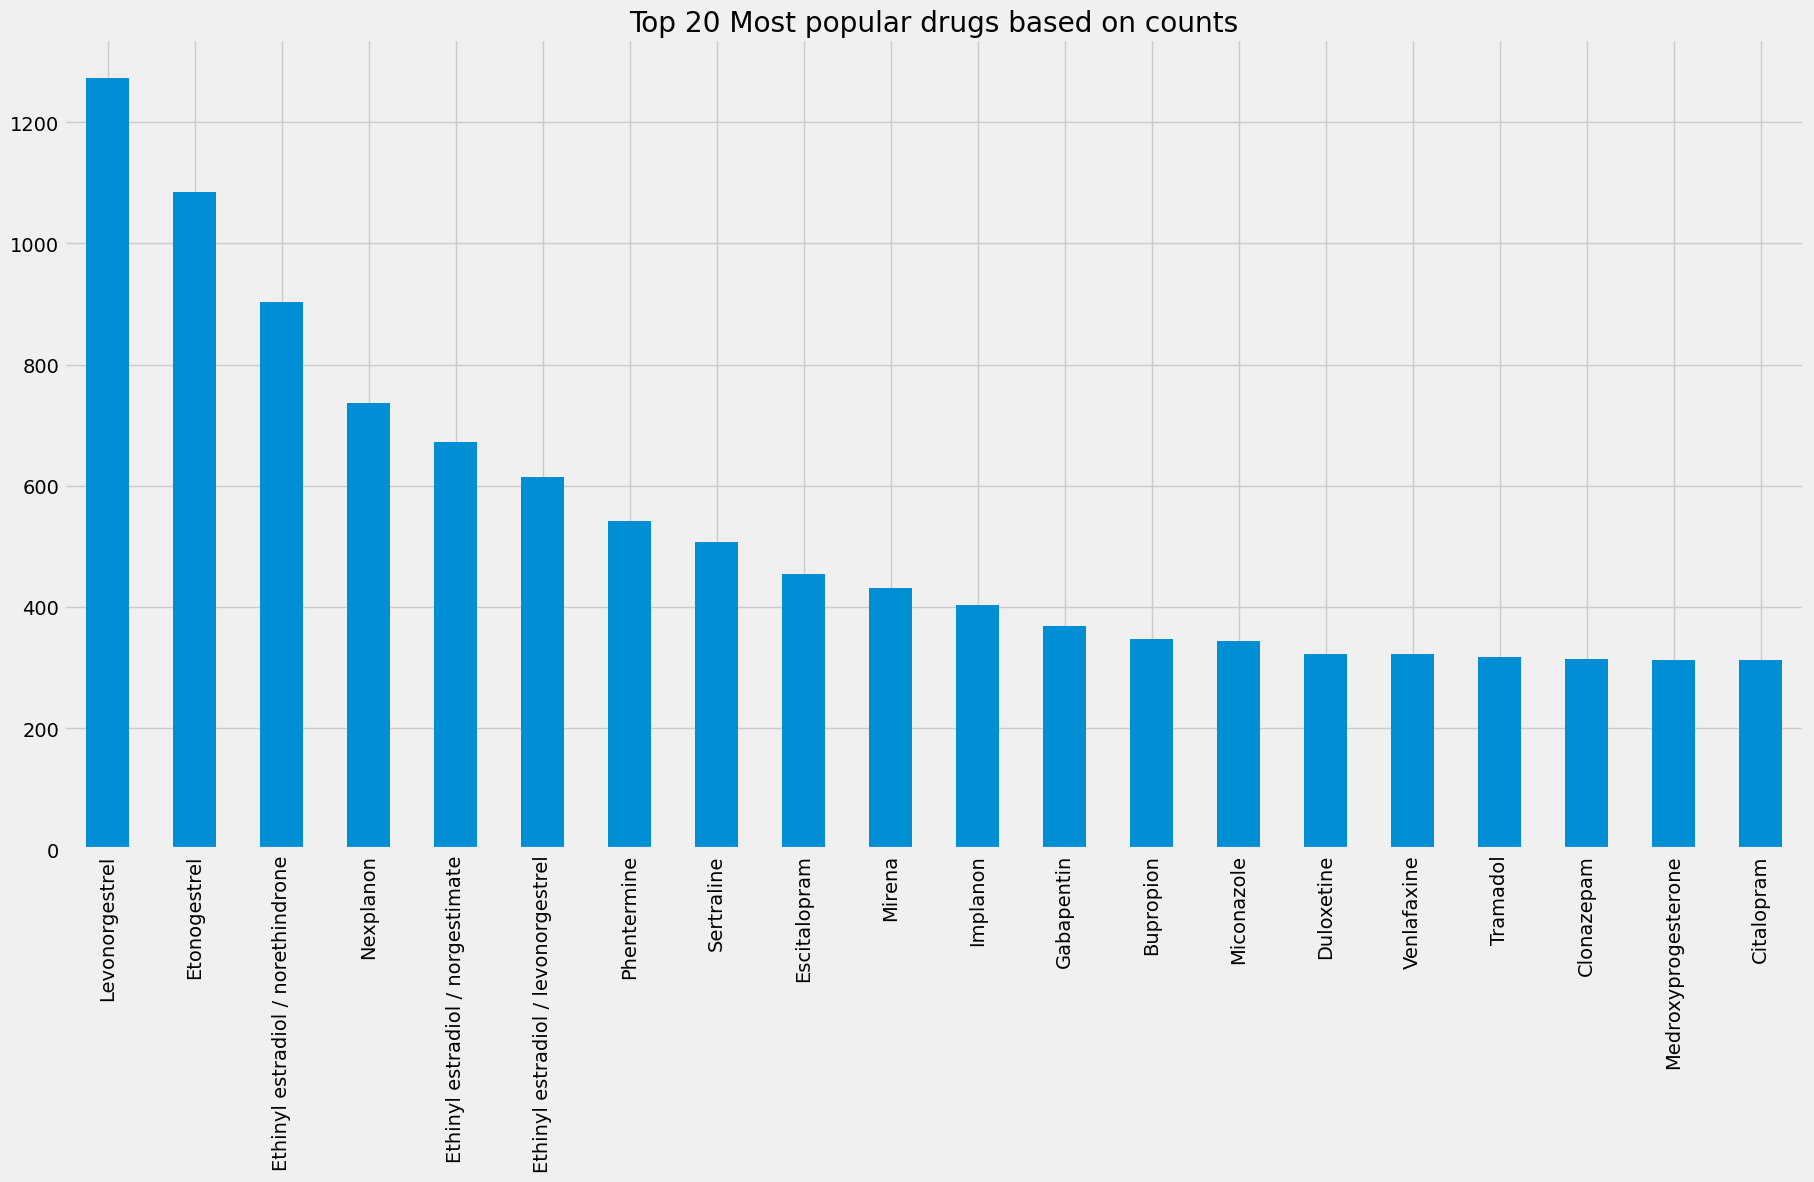

In [27]:
plt.figure(figsize=(20,10))
df['drugName'].value_counts().nlargest(20).plot(kind='bar')
plt.title("Top 20 Most popular drugs based on counts")
plt.show()

In [16]:
nmf = NMF(n_components=n_topics)
nmf_topics = nmf.fit_transform(tfidf)


NameError: name 'n_topics' is not defined

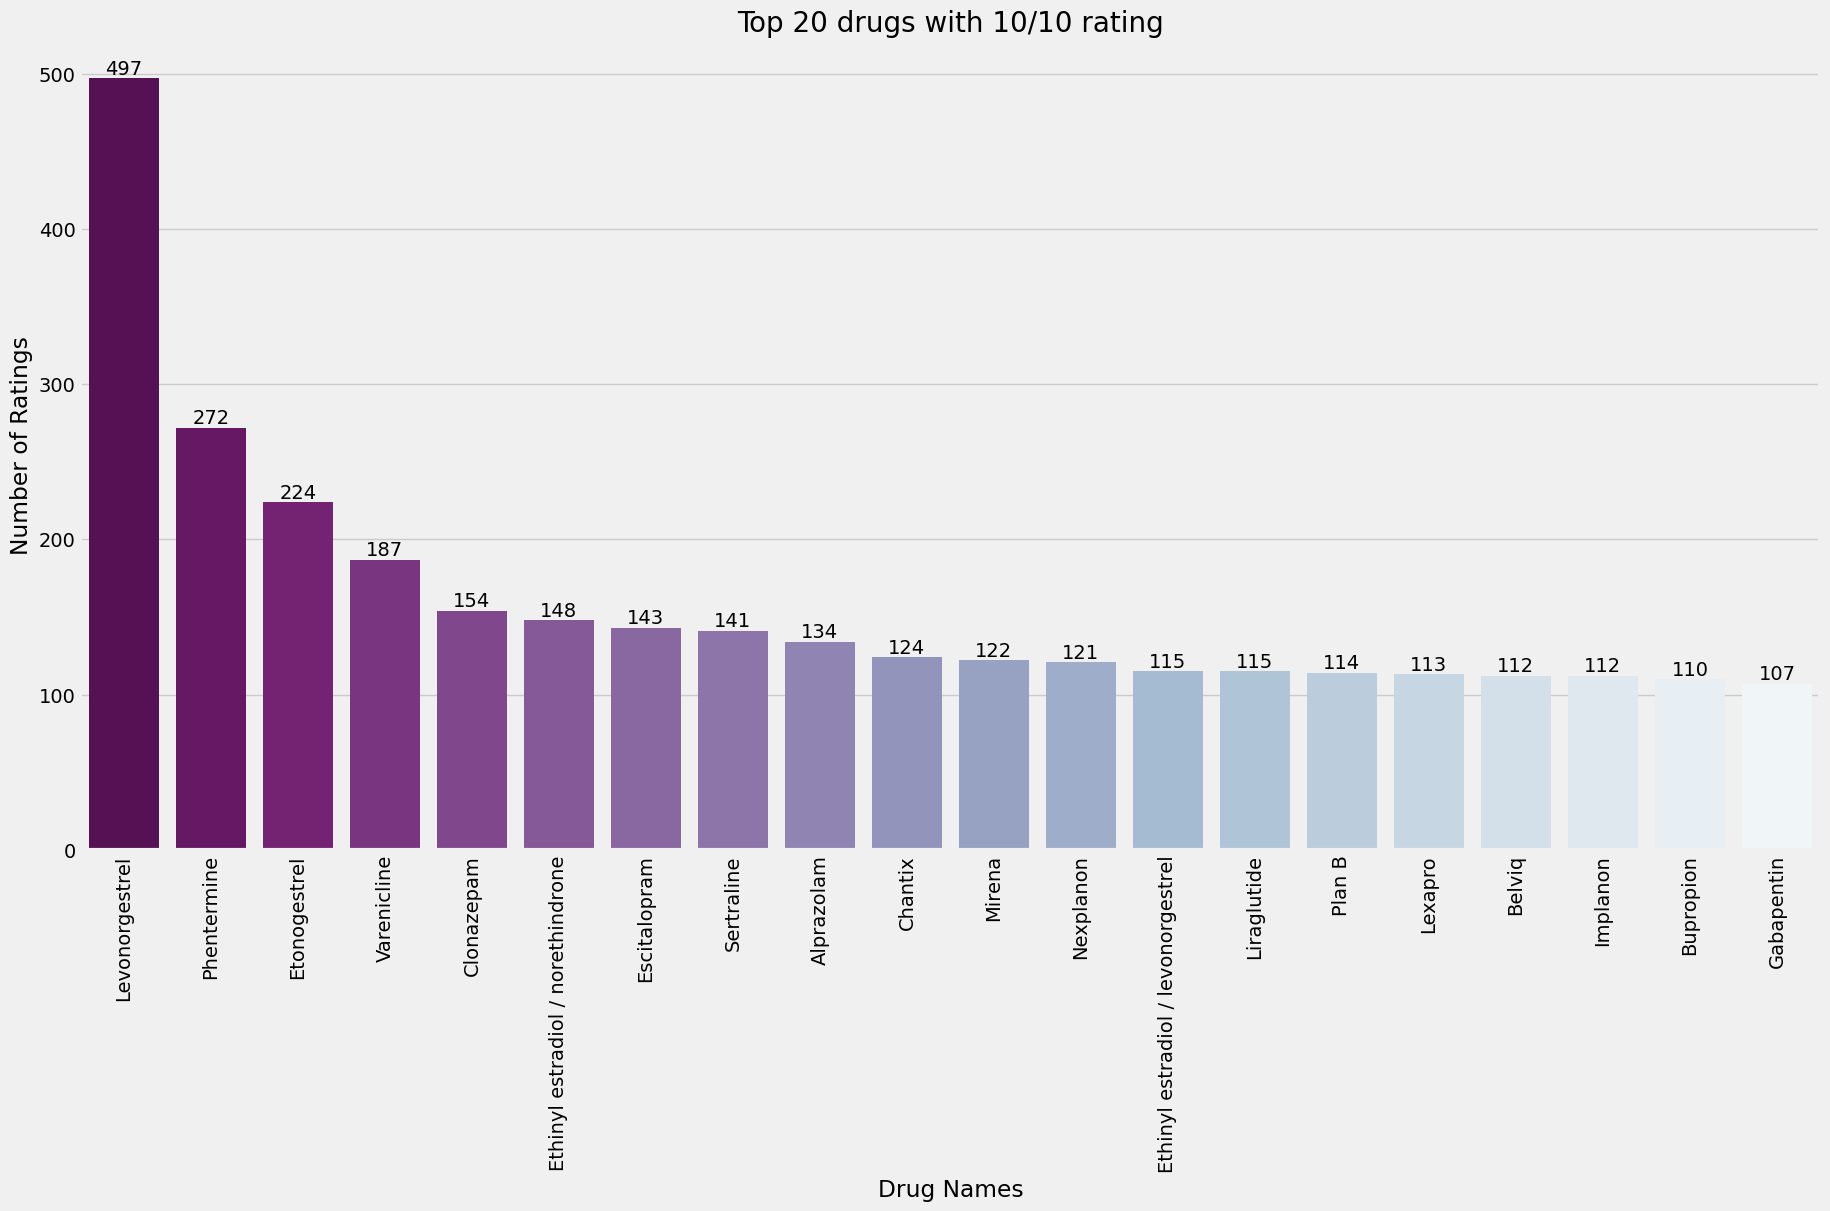

In [28]:
plt.figure(figsize=(20,10))
rating = dict(df.loc[df.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'BuPu_r')

for i in sns_rating.containers:
    sns_rating.bar_label(i,)

sns_rating.set_title('Top 20 drugs with 10/10 rating', fontsize=20)
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90)
plt.show()


In [ ]:
dictionary = Dictionary(tfidf)
corpus = [dictionary.doc2bow(review) for review in reviews]

lda = LdaModel(corpus, num_topics=n_topics, id2word=dictionary)
lda_topics = lda.get_document_topics(corpus)


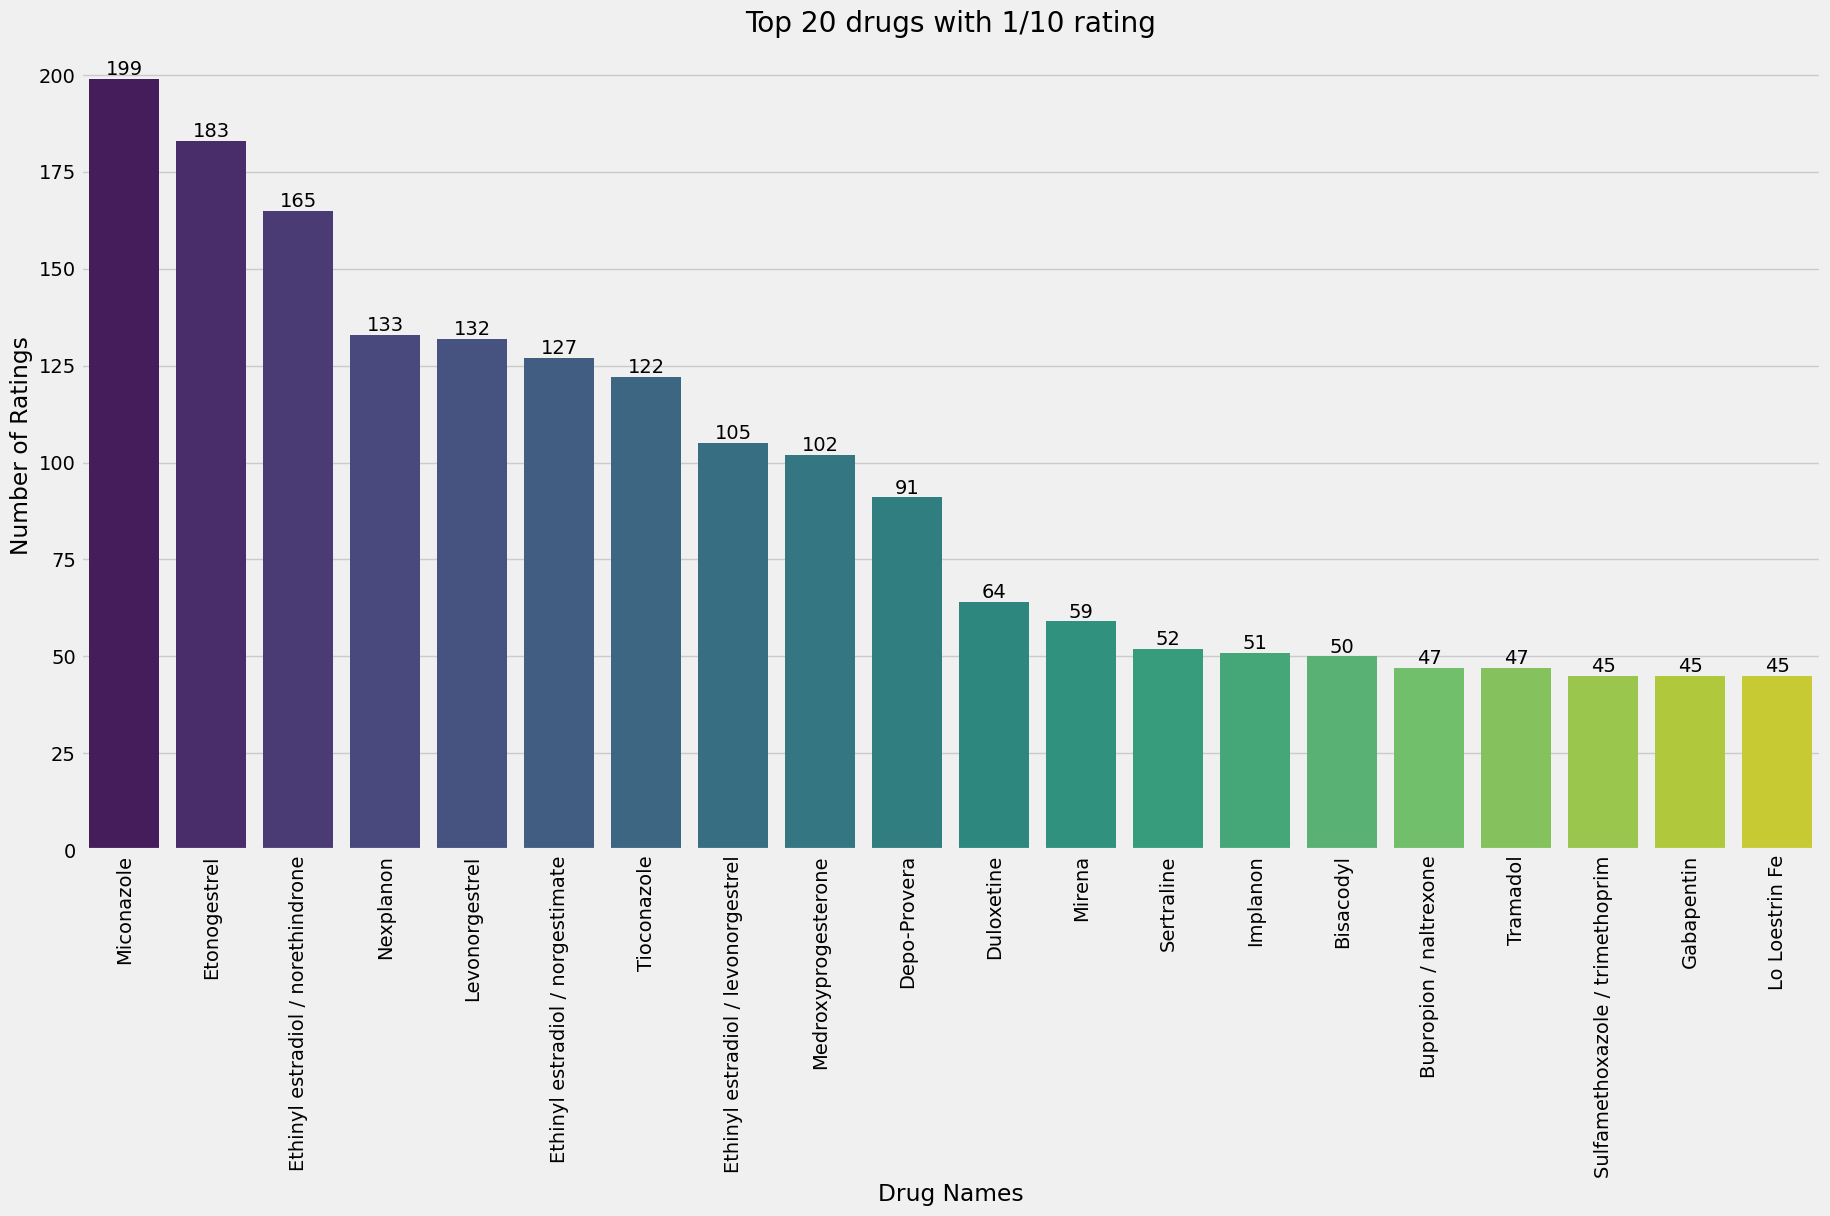

In [29]:
plt.figure(figsize=(20,10))
rating = dict(df.loc[df.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'viridis')

for i in sns_rating.containers:
    sns_rating.bar_label(i,)

sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90)
plt.show()

In [15]:
lda = LdaModel(corpus, num_topics=n_topics, id2word=dictionary)
log_likelihood = lda.score(corpus)


NameError: name 'corpus' is not defined

In [31]:
drug_suffix = {"azole":"antifungal (except metronidazole)",
"caine":"anesthetic",
"cillin":"antibiotic(penicillins)",
"mycin":"antibiotic",
"micin":"antibiotic",
"cycline":"antibiotic",
"oxacin":"antibiotic",
"ceph":"antibiotic(cephalosporins)",
"cef":"antibiotic (cephalosporins)",
"dine":"h2 blockers (anti-ulcers)",
"done":"opiod analgesics",
"ide":"oral hypoglycemics",
"lam":"anti-anxiety",
"pam":"anti-anxiety",
"mide":"diuretics",
"zide":"diuretics",
"nium":"neuromuscular blocking agents",
"olol":"beta blockers",
"tidine":"h2 antagonist",
"tropin":"pituitary hormone",
"zosin":"alpha blocker",
"ase":"thrombolytics",
"plase":"thrombolytics",
"azepam":"anti-anziety(benzodiazepine)",
"azine":"antipyschotics (phenothiazine)",
"barbital":"barbiturate",
"dipine":"calcium channel blocker",
"lol":"beta blocker",
"zolam":"cns depressants",
"pril":"ace inhibitor",
"artan":"arb blocker",
"statins":"lipid-lowering drugs",
"parin":"anticoagulants",
"sone":"corticosteroid (prednisone)"}


In [32]:
def classify_drug(drugname):
    for i in drug_suffix.keys():
        if drugname.endswith(i):
            return drug_suffix[i]

In [33]:
classify_drug('valsartan')

'arb blocker'

In [35]:
df['drug_class'] = df['drugName'].apply(classify_drug)

In [36]:
df[['drugName','drug_class']]

,drugName,drug_class
0,Mirtazapine,None
1,Mesalamine,None
2,Bactrim,None
3,Contrave,None
4,Cyclafem 1 / 35,None
...,...,...
53761,Tamoxifen,None
53762,Escitalopram,None
53763,Levonorgestrel,None
53764,Tapentadol,None


In [38]:
grp_drugs = len(df['drug_class'].unique().tolist())
print('Groups of Drugs by Class - ',grp_drugs)

Groups of Drugs by Class -  23


In [39]:
df['drug_class'].value_counts()

antifungal (except metronidazole)    1388
opiod analgesics                     1387
oral hypoglycemics                   1157
antibiotic                           1131
anti-anxiety                          919
h2 blockers (anti-ulcers)             434
beta blockers                         318
corticosteroid (prednisone)           314
antipyschotics (phenothiazine)        208
arb blocker                           179
ace inhibitor                         133
calcium channel blocker                91
alpha blocker                          56
anesthetic                             47
thrombolytics                          45
antibiotic(penicillins)                33
beta blocker                           32
neuromuscular blocking agents          21
antibiotic (cephalosporins)            14
barbiturate                            10
pituitary hormone                       8
anticoagulants                          5
Name: drug_class, dtype: int64

In [37]:
df['drug_class'].unique().tolist()

[None,
 'opiod analgesics',
 'antifungal (except metronidazole)',
 'antibiotic',
 'anti-anxiety',
 'calcium channel blocker',
 'antipyschotics (phenothiazine)',
 'h2 blockers (anti-ulcers)',
 'oral hypoglycemics',
 'beta blockers',
 'barbiturate',
 'ace inhibitor',
 'antibiotic (cephalosporins)',
 'pituitary hormone',
 'corticosteroid (prednisone)',
 'beta blocker',
 'alpha blocker',
 'anesthetic',
 'thrombolytics',
 'antibiotic(penicillins)',
 'arb blocker',
 'neuromuscular blocking agents',
 'anticoagulants']

In [40]:
plt.figure(figsize=(20,10))
sns_1 = sns.countplot(df['drug_class'], palette = 'spring')

for i in sns_1.containers:
    sns_1.bar_label(i,)
    
sns_1.set_title('Count of Ratings')
sns_1.set_xlabel("Rating")
sns_1.set_xlabel("Drug class")
plt.setp(sns_1.get_xticklabels(), rotation=90)
plt.show()

ValueError: could not convert string to float: 'opiod analgesics'

<Figure size 2000x1000 with 0 Axes>

In [12]:
lda = LdaModel(corpus, num_topics=n_topics, id2word=dictionary)
topics = lda.show_topics(num_topics=10, num_words=20, formatted=False)


NameError: name 'corpus' is not defined

In [41]:
drug_groups = df.groupby('drug_class').size()

In [42]:
type(drug_groups)

pandas.core.series.Series

In [43]:
drug_groups.to_frame()

,0
drug_class,
ace inhibitor,133
alpha blocker,56
anesthetic,47
anti-anxiety,919
antibiotic,1131
antibiotic (cephalosporins),14
antibiotic(penicillins),33
anticoagulants,5
antifungal (except metronidazole),1388


In [44]:
drug_groups_df = pd.DataFrame({'drug_class':drug_groups.index,'counts':drug_groups.values})

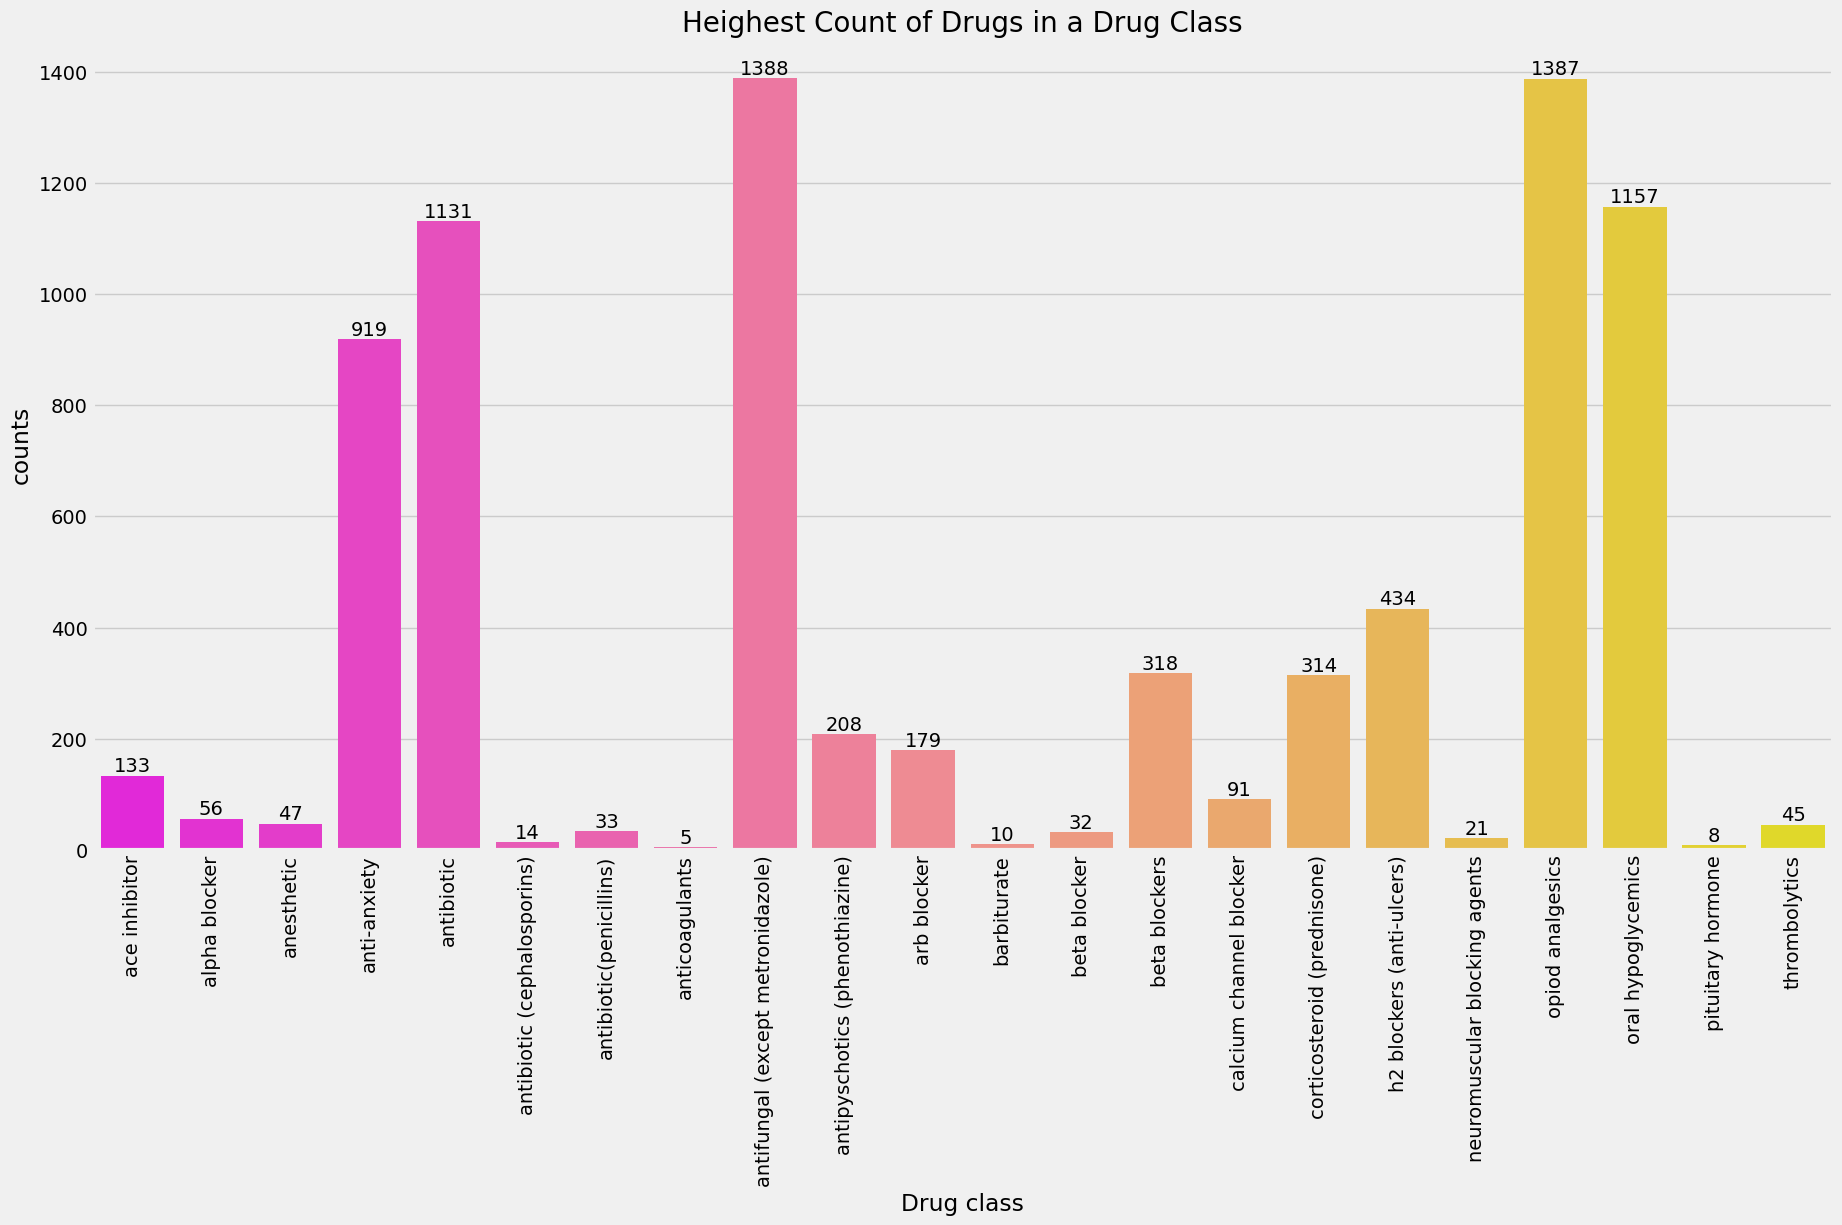

In [45]:
plt.figure(figsize=(20,10))
# g = sns.barplot(data=drug_groups_df,x='drug_class',y='counts', palette='gnuplot_r')

sns_1 = sns.barplot(data=drug_groups_df,x='drug_class',y='counts', palette = 'spring')

for i in sns_1.containers:
    sns_1.bar_label(i,)
    
sns_1.set_title('Heighest Count of Drugs in a Drug Class', fontsize=20)
sns_1.set_xlabel("count")
sns_1.set_xlabel("Drug class")


sns_1.set_xticklabels(drug_groups_df['drug_class'].values,rotation=90)
plt.show()

In [46]:
len(df['condition'].unique().tolist())

709

In [47]:
df['condition'].value_counts()

Birth Control                                  9648
Depression                                     3095
Pain                                           2100
Anxiety                                        1908
Acne                                           1847
                                               ... 
Gender Dysphoria                                  1
83</span> users found this comment helpful.       1
Meningococcal Meningitis Prophylaxis              1
Tympanostomy Tube Placement Surgery               1
Strongyloidiasis                                  1
Name: condition, Length: 708, dtype: int64

In [48]:
common_conditions = df['condition'].value_counts().nlargest(20)

In [49]:
new = pd.DataFrame({'drug_class':common_conditions.index,'counts':common_conditions.values})

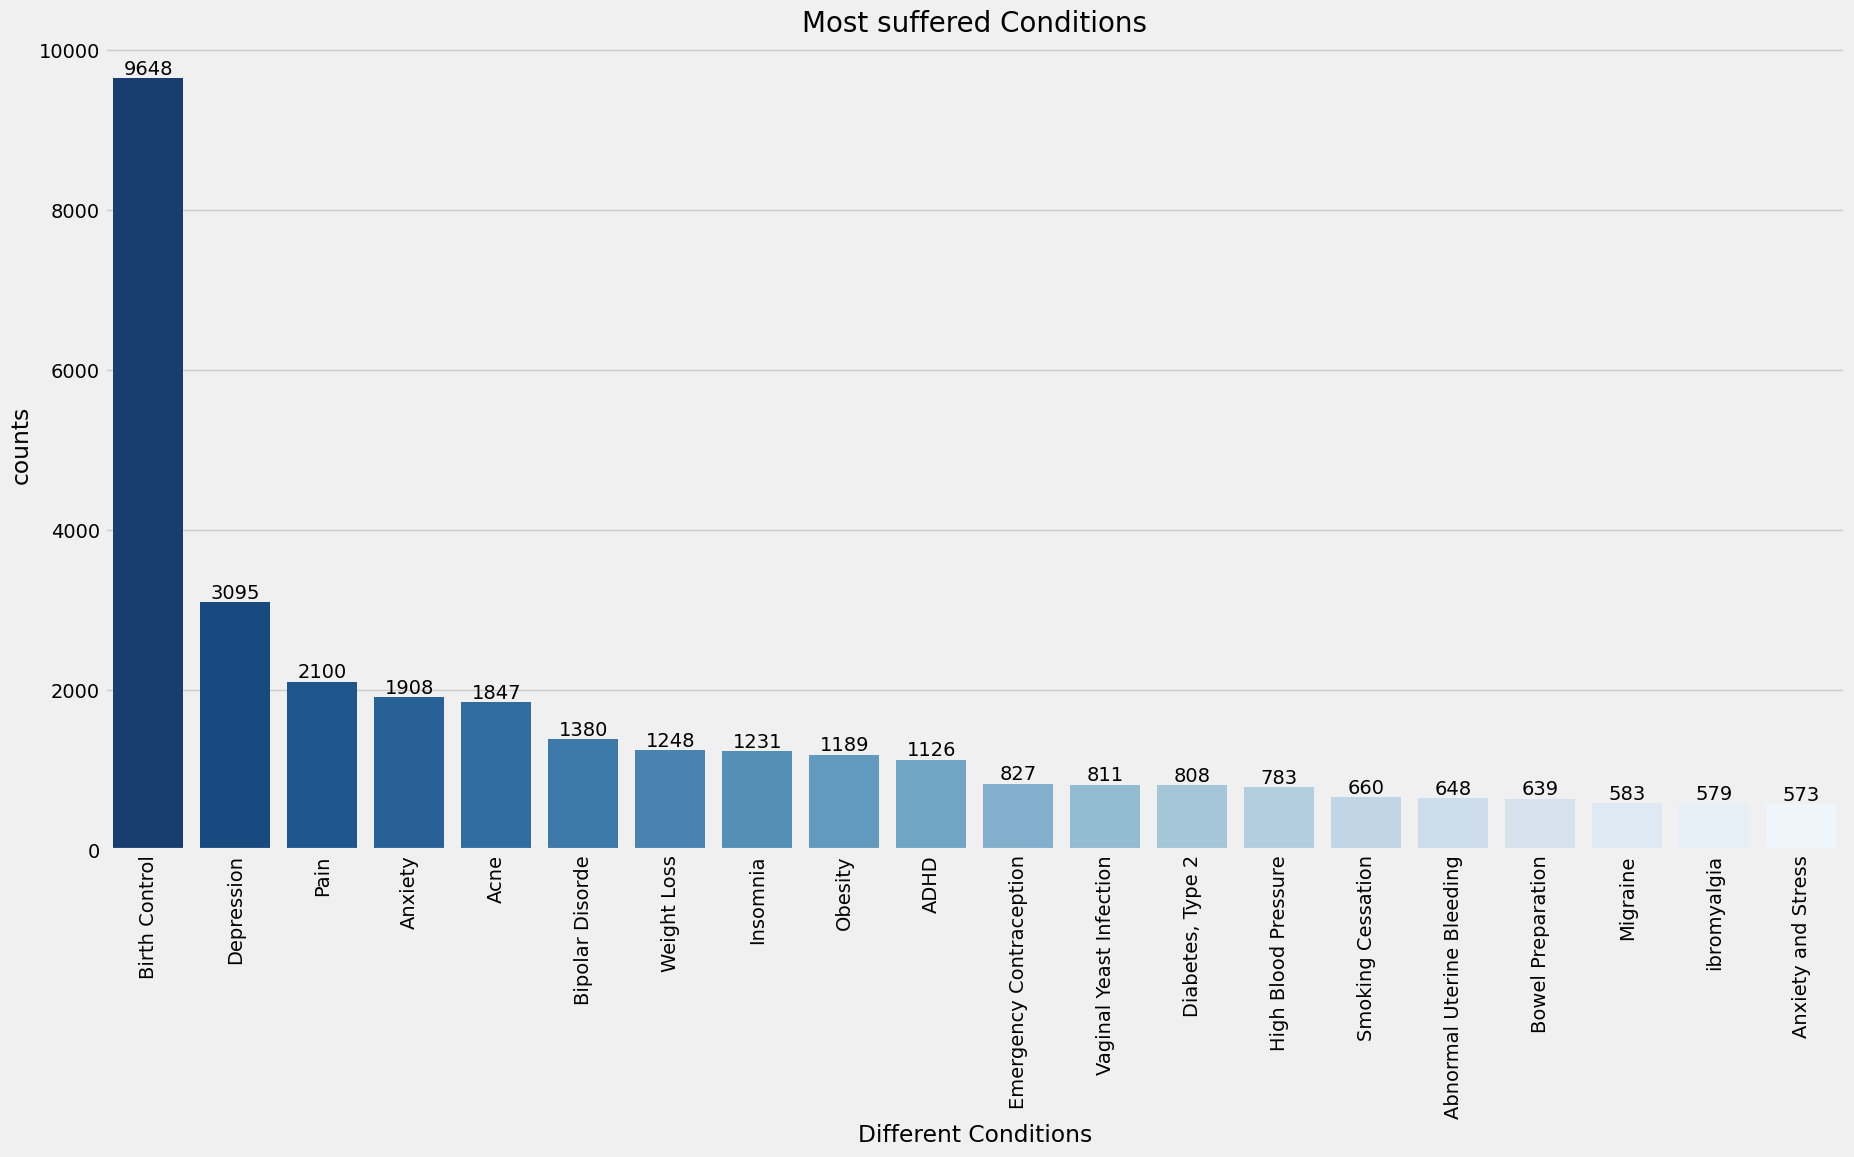

In [50]:
plt.figure(figsize=(20,10))

sns_1 = sns.barplot(data=new,x='drug_class',y='counts', palette = 'Blues_r')

for i in sns_1.containers:
    sns_1.bar_label(i,)
    
sns_1.set_title('Most suffered Conditions', fontsize=20)
sns_1.set_xlabel("Rating")
sns_1.set_xlabel("Different Conditions")
plt.setp(sns_1.get_xticklabels(), rotation=90)
plt.show()

In [51]:
df['condition'].value_counts().nsmallest(20)

Wolff-Parkinson-White Syndrome                  1
Sunburn                                         1
me                                              1
Urinary Retention                               1
Head Injury                                     1
Herpes Zoster, Prophylaxis                      1
Pemphigus                                       1
Strabismus                                      1
Organ Transplant, Rejection Reversal            1
Gonadotropin Inhibition                         1
Squamous Cell Carcinoma                         1
Leukemia                                        1
ibrocystic Breast Disease                       1
Ovarian Cance                                   1
Premature Ejaculation                           1
Glioblastoma Multi                              1
B12 Nutritional Deficiency                      1
cal Segmental Glomerulosclerosis                1
100</span> users found this comment helpful.    1
Hyperkalemia                                    1


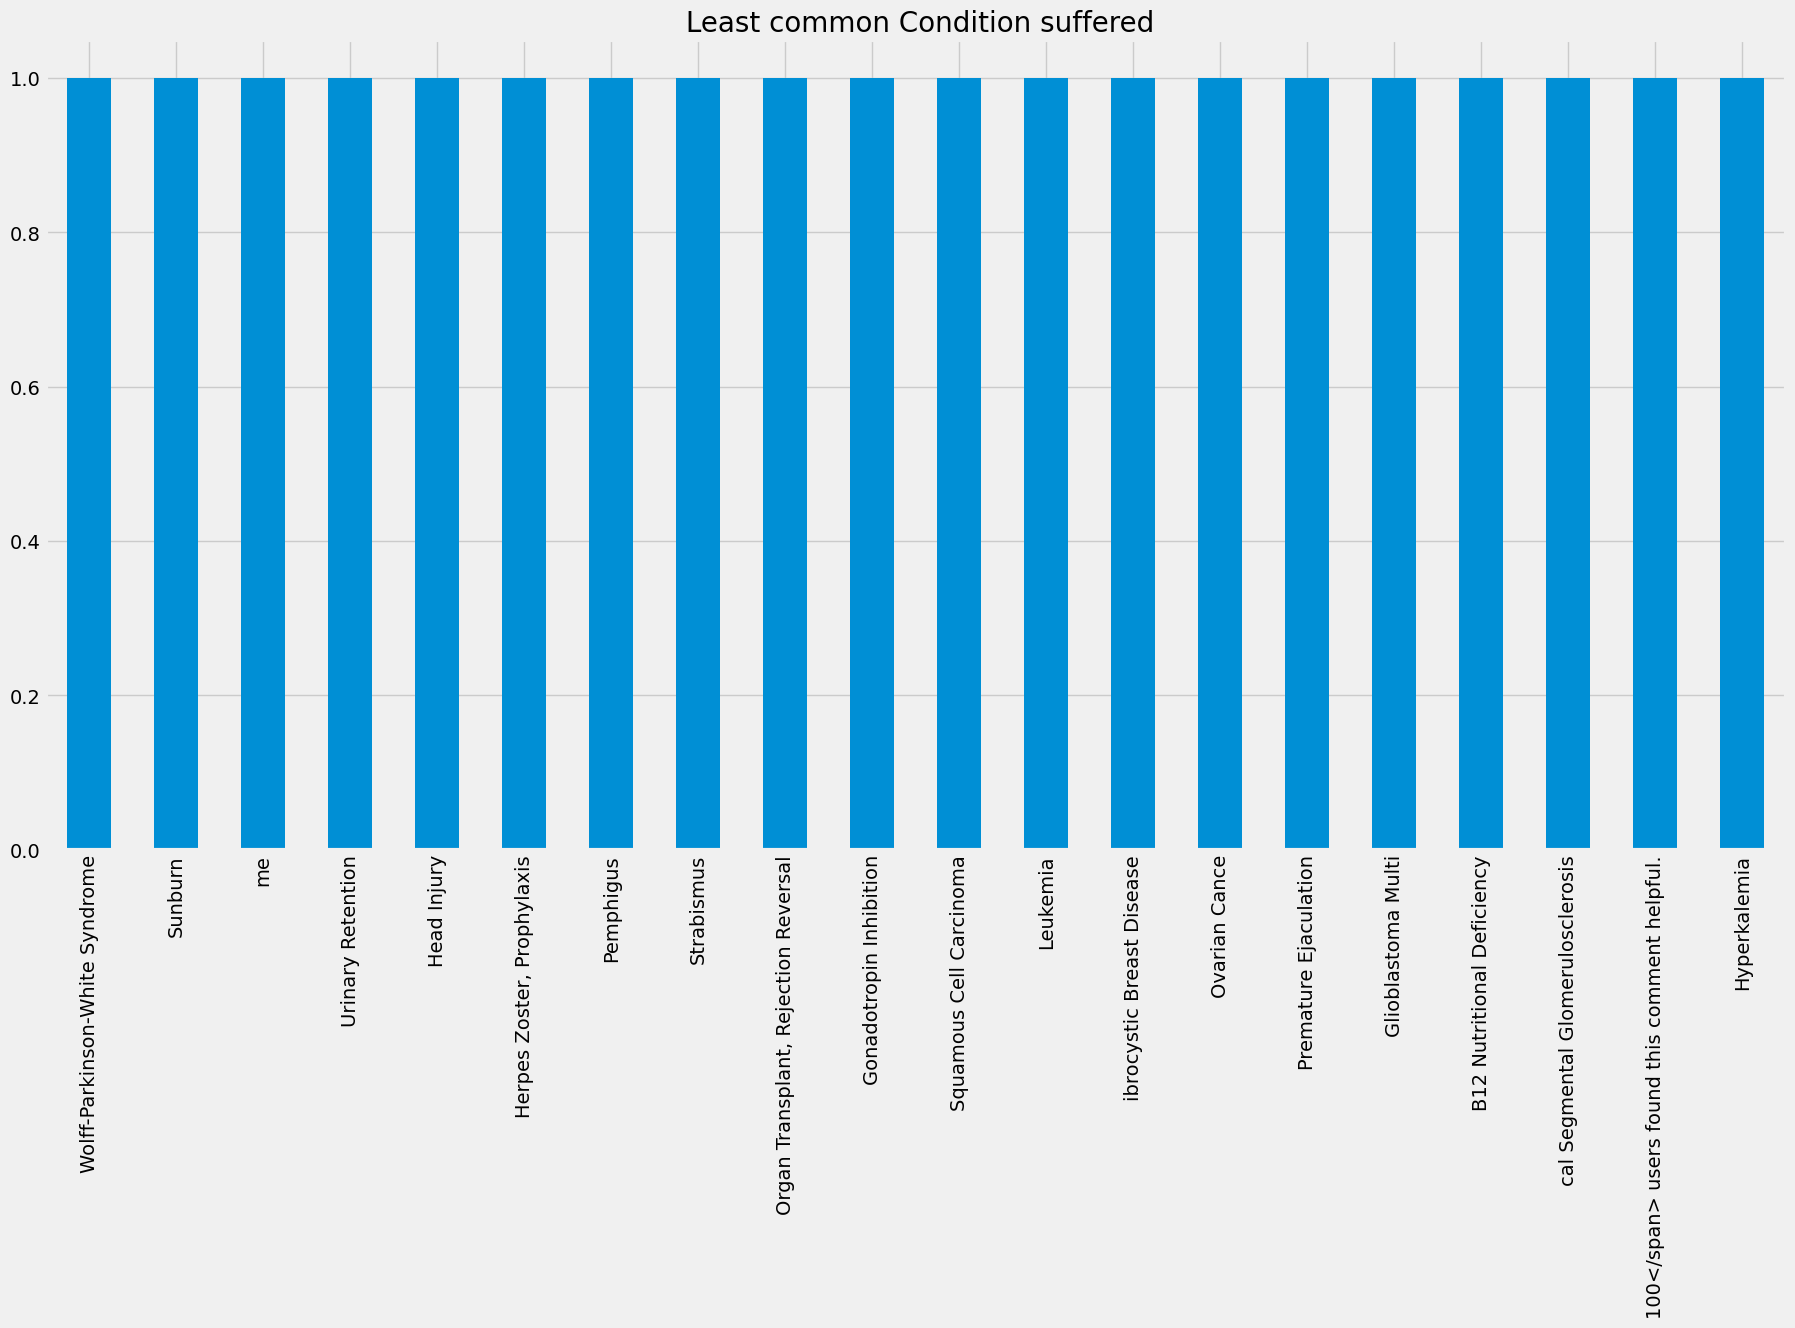

In [52]:
df['condition'].value_counts().nsmallest(20).plot(kind='bar',figsize=(20,10))
plt.title(' Least common Condition suffered', fontsize=20)
plt.show()

In [53]:
drug_per_cond = df.groupby('condition')['drugName'].nunique().nlargest(20)

In [54]:
drug_per_cond_df = pd.DataFrame({'drug_class':drug_per_cond.index,'counts':drug_per_cond.values})

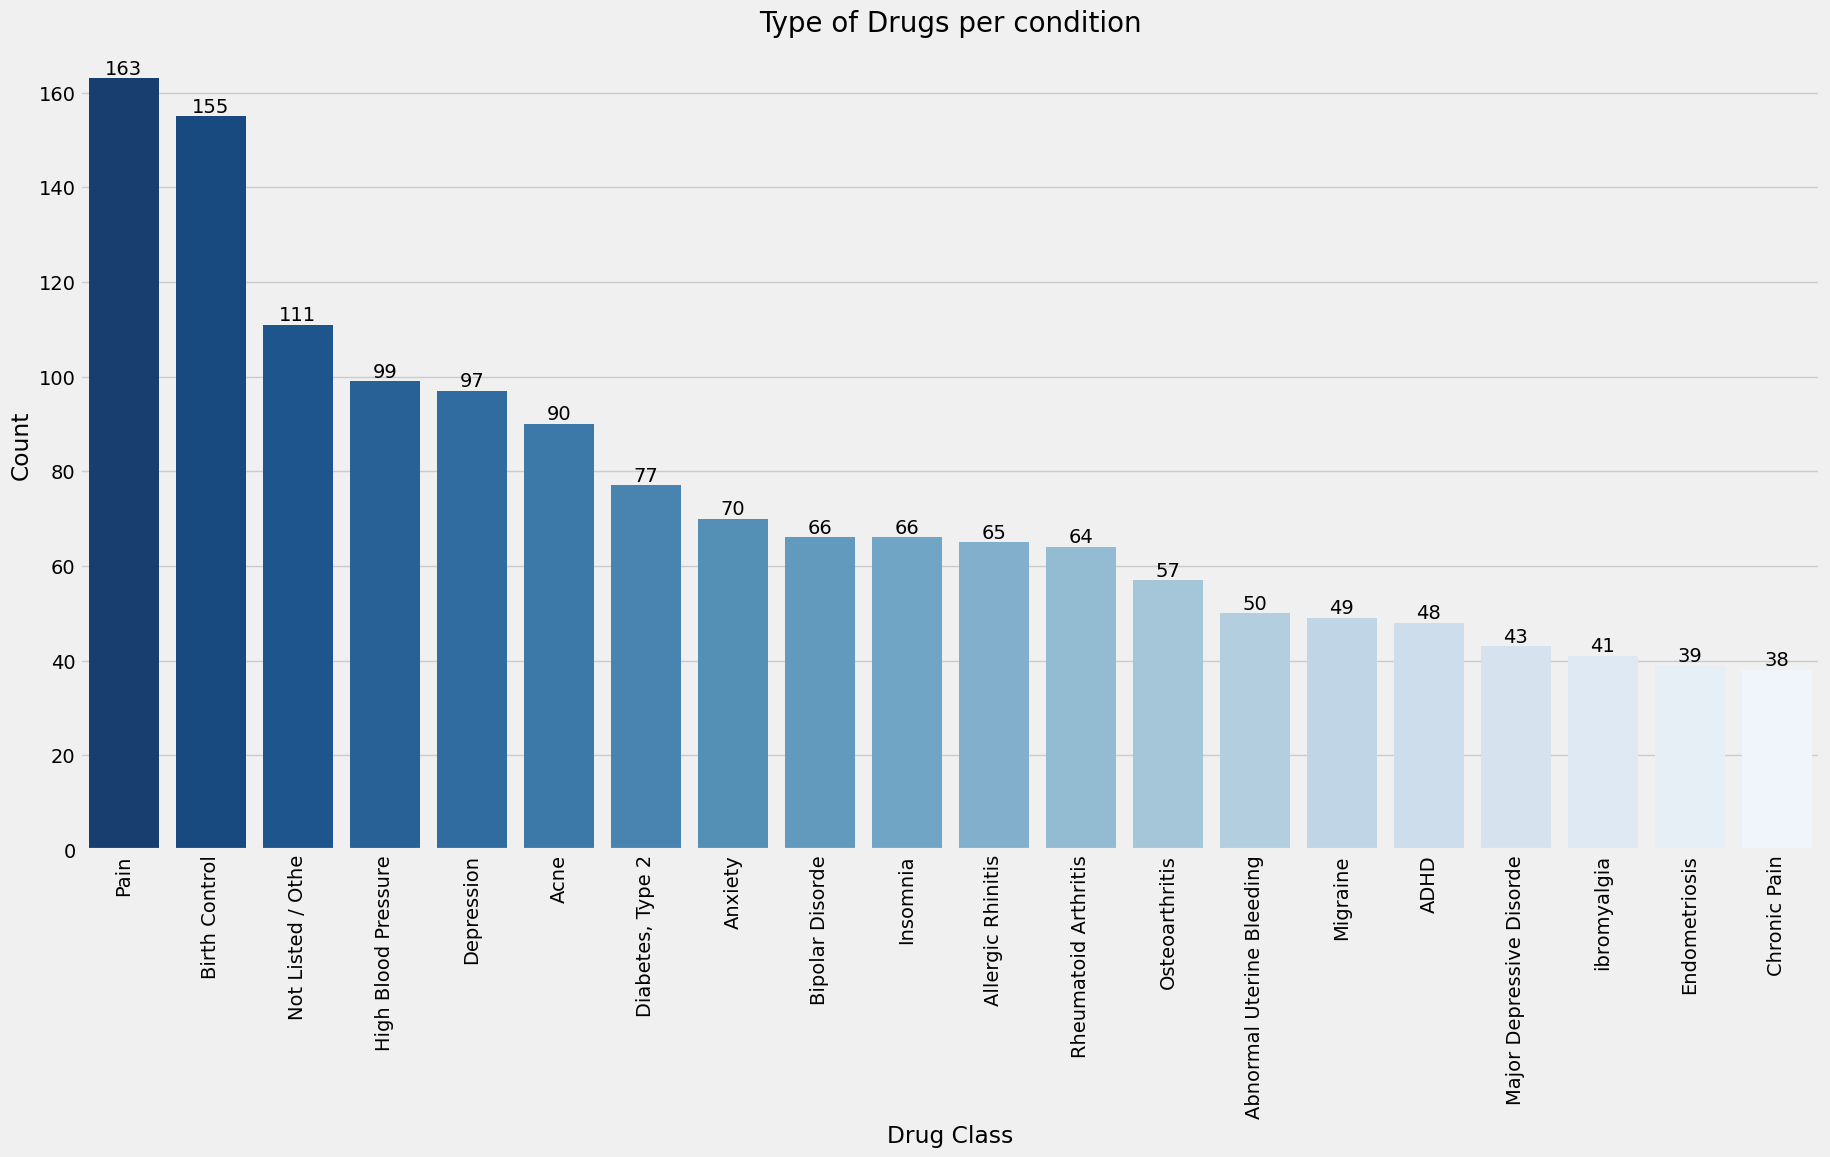

In [55]:
plt.figure(figsize=(20,10))

sns_1 = sns.barplot(data=drug_per_cond_df,x='drug_class',y='counts', palette = 'Blues_r')

for i in sns_1.containers:
    sns_1.bar_label(i,)
    
sns_1.set_title('Type of Drugs per condition', fontsize=20)
sns_1.set_xlabel("Drug Class")
sns_1.set_ylabel("Count")
plt.setp(sns_1.get_xticklabels(), rotation=90)
plt.show()

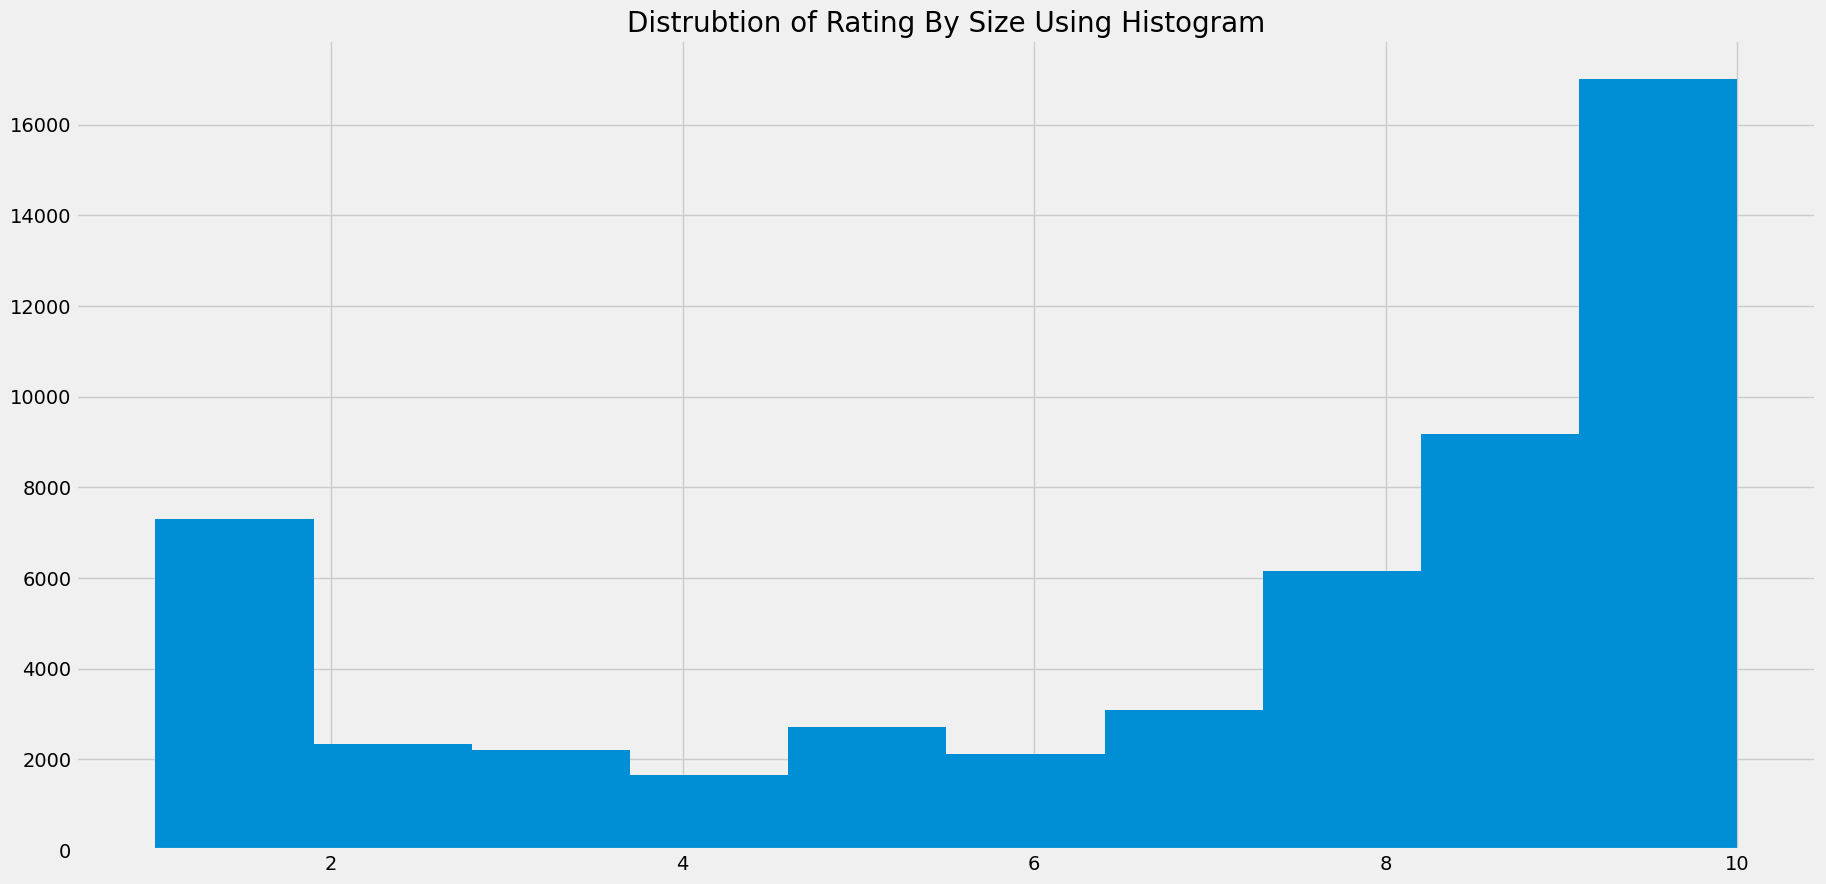

In [56]:
plt.figure(figsize=(20,10))
df['rating'].hist()
plt.title("Distrubtion of Rating By Size Using Histogram", fontsize=20)
plt.show()

In [57]:
avg_rating = (df['rating'].groupby(df['drugName']).mean())
avg_rating

drugName
A / B Otic                              10.00000
Abacavir / dolutegravir / lamivudine     9.00000
Abacavir / lamivudine                   10.00000
Abatacept                                6.50000
Abilify                                  6.14966
                                          ...   
ZzzQuil                                  1.00000
depo-subQ provera 104                   10.00000
ella                                     7.70000
femhrt                                   9.00000
pHisoHex                                10.00000
Name: rating, Length: 2637, dtype: float64

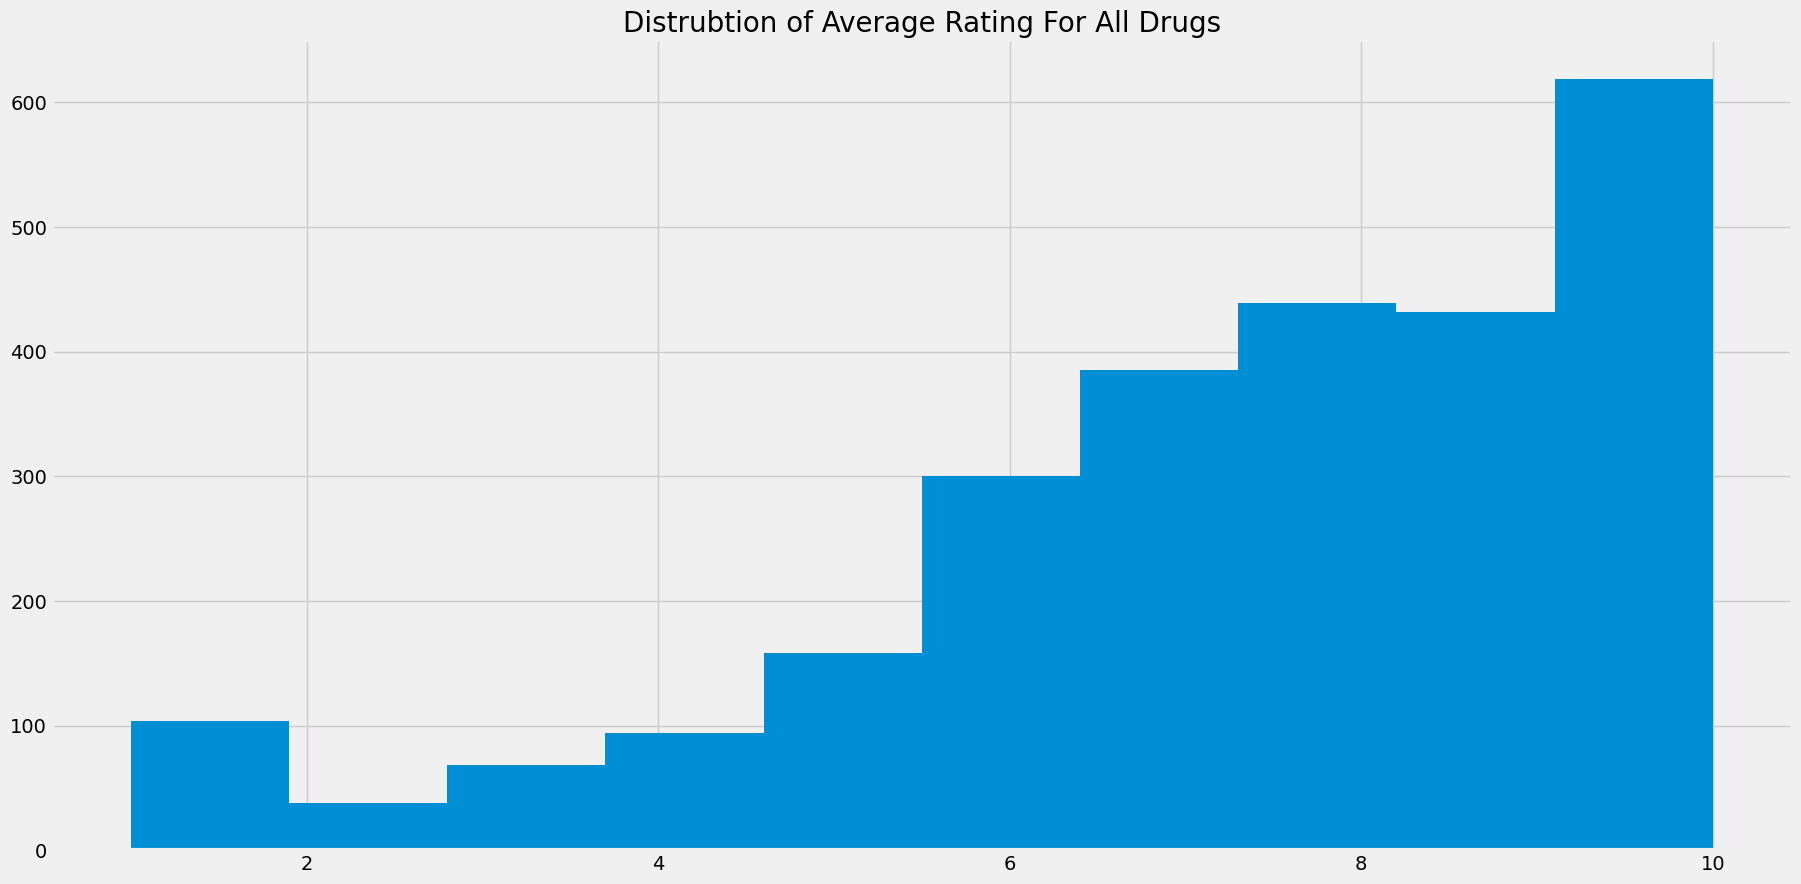

In [58]:
plt.figure(figsize=(20,10))
avg_rating.hist()
plt.title("Distrubtion of Average Rating For All Drugs", fontsize=20)
plt.show()

In [59]:
df['date'] = pd.to_datetime(df['date'], errors = 'coerce')

# extracting year from date
df['Year'] = df['date'].dt.year

# extracting the month from the date
df['month'] = df['date'].dt.month

# extracting the days from the date
df['day'] = df['date'].dt.day

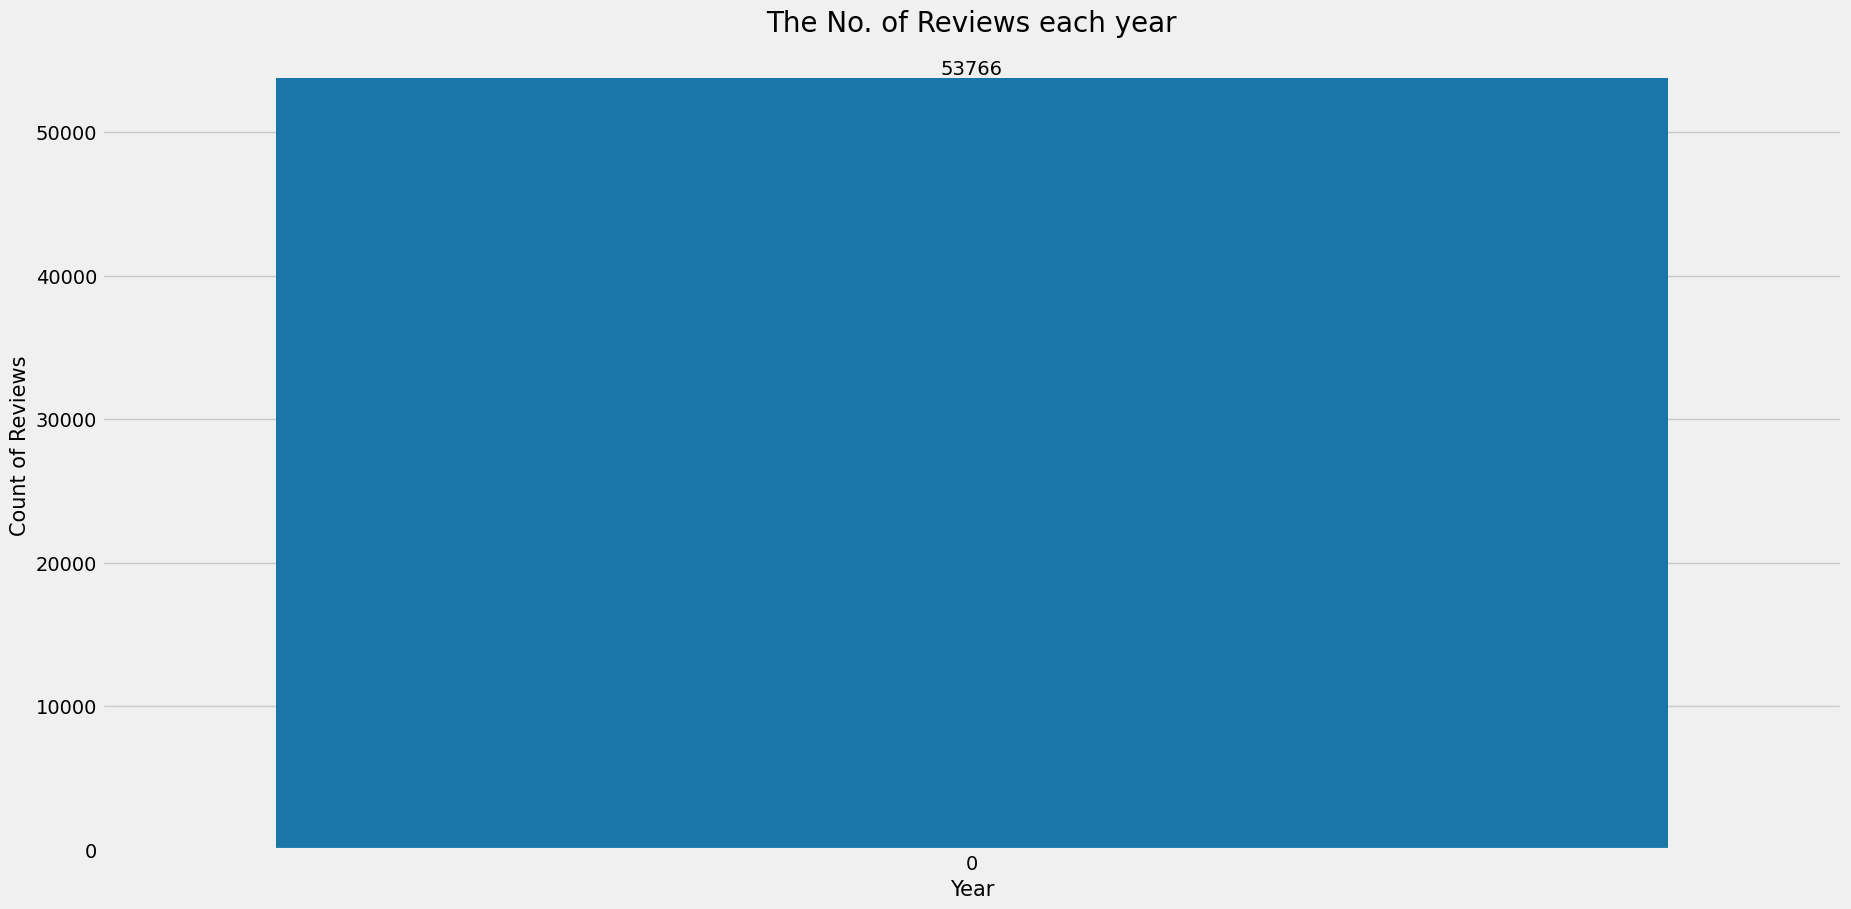

In [60]:
plt.figure(figsize=(20,10))
sns_=sns.countplot(df['Year'], palette ='winter_r')

for i in sns_.containers:
    sns_.bar_label(i,)
    
plt.title('The No. of Reviews each year', fontsize = 20)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
plt.show()

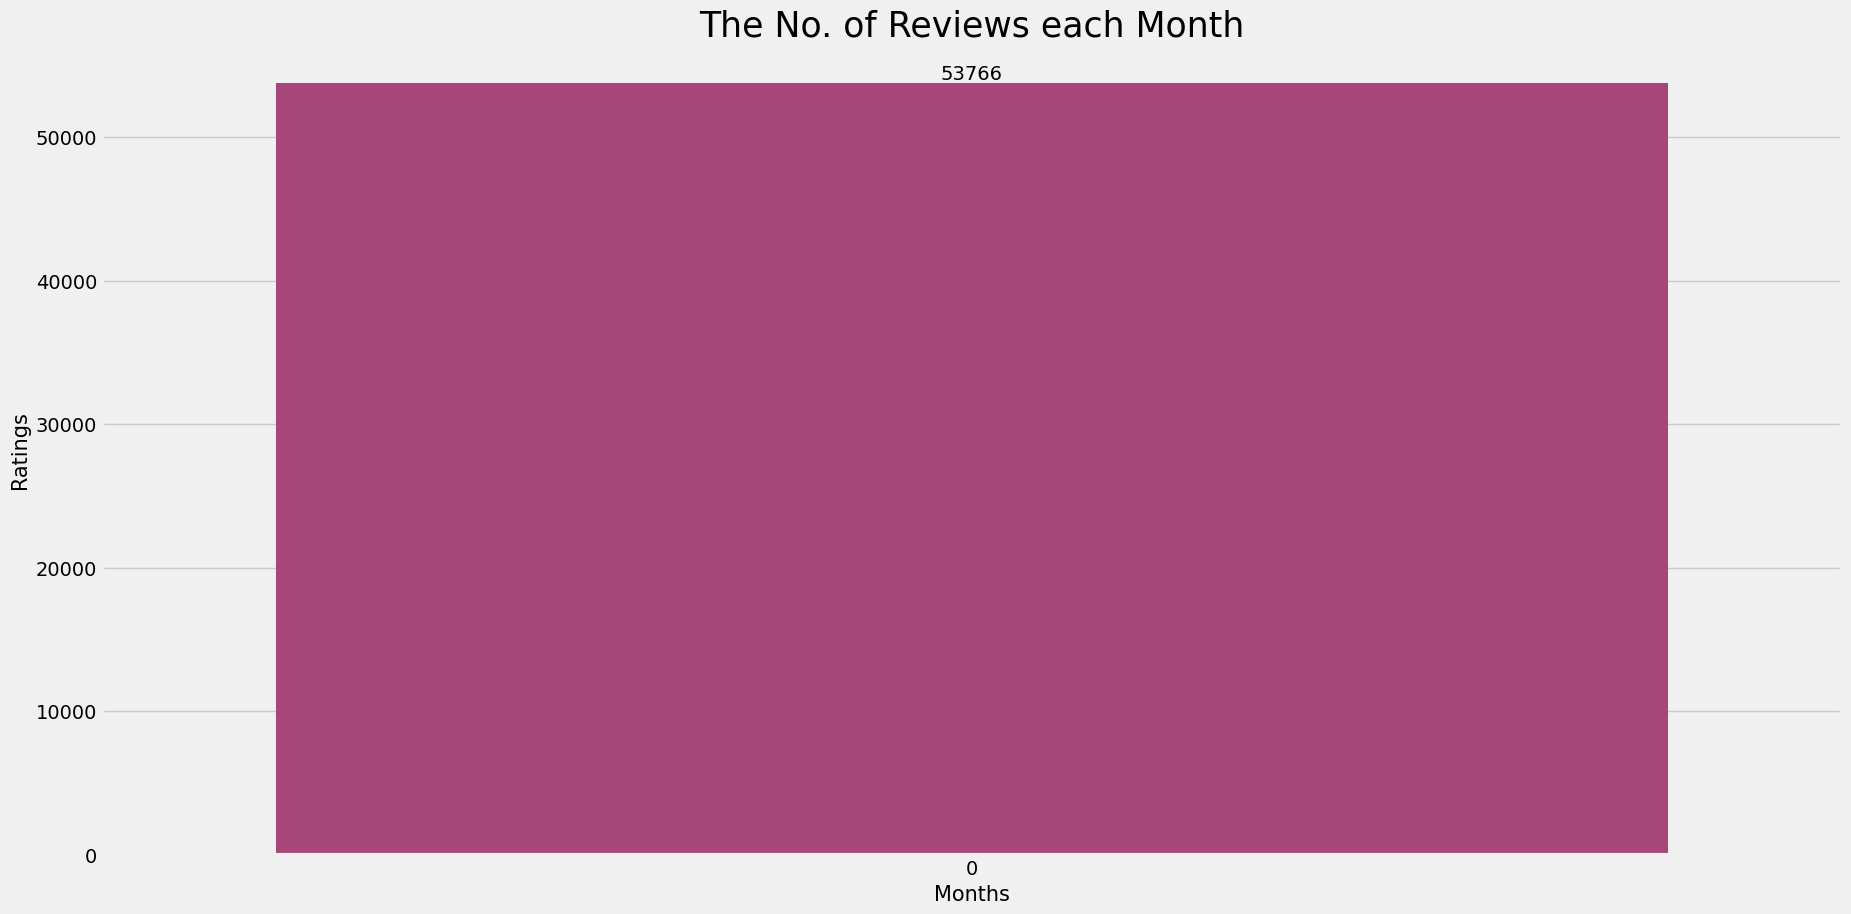

In [61]:
plt.figure(figsize=(20,10))
sns_=sns.countplot(df['month'], palette ='magma')

for i in sns_.containers:
    sns_.bar_label(i,)

plt.title('The No. of Reviews each Month', fontsize = 25)
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Ratings', fontsize = 15)
plt.show()

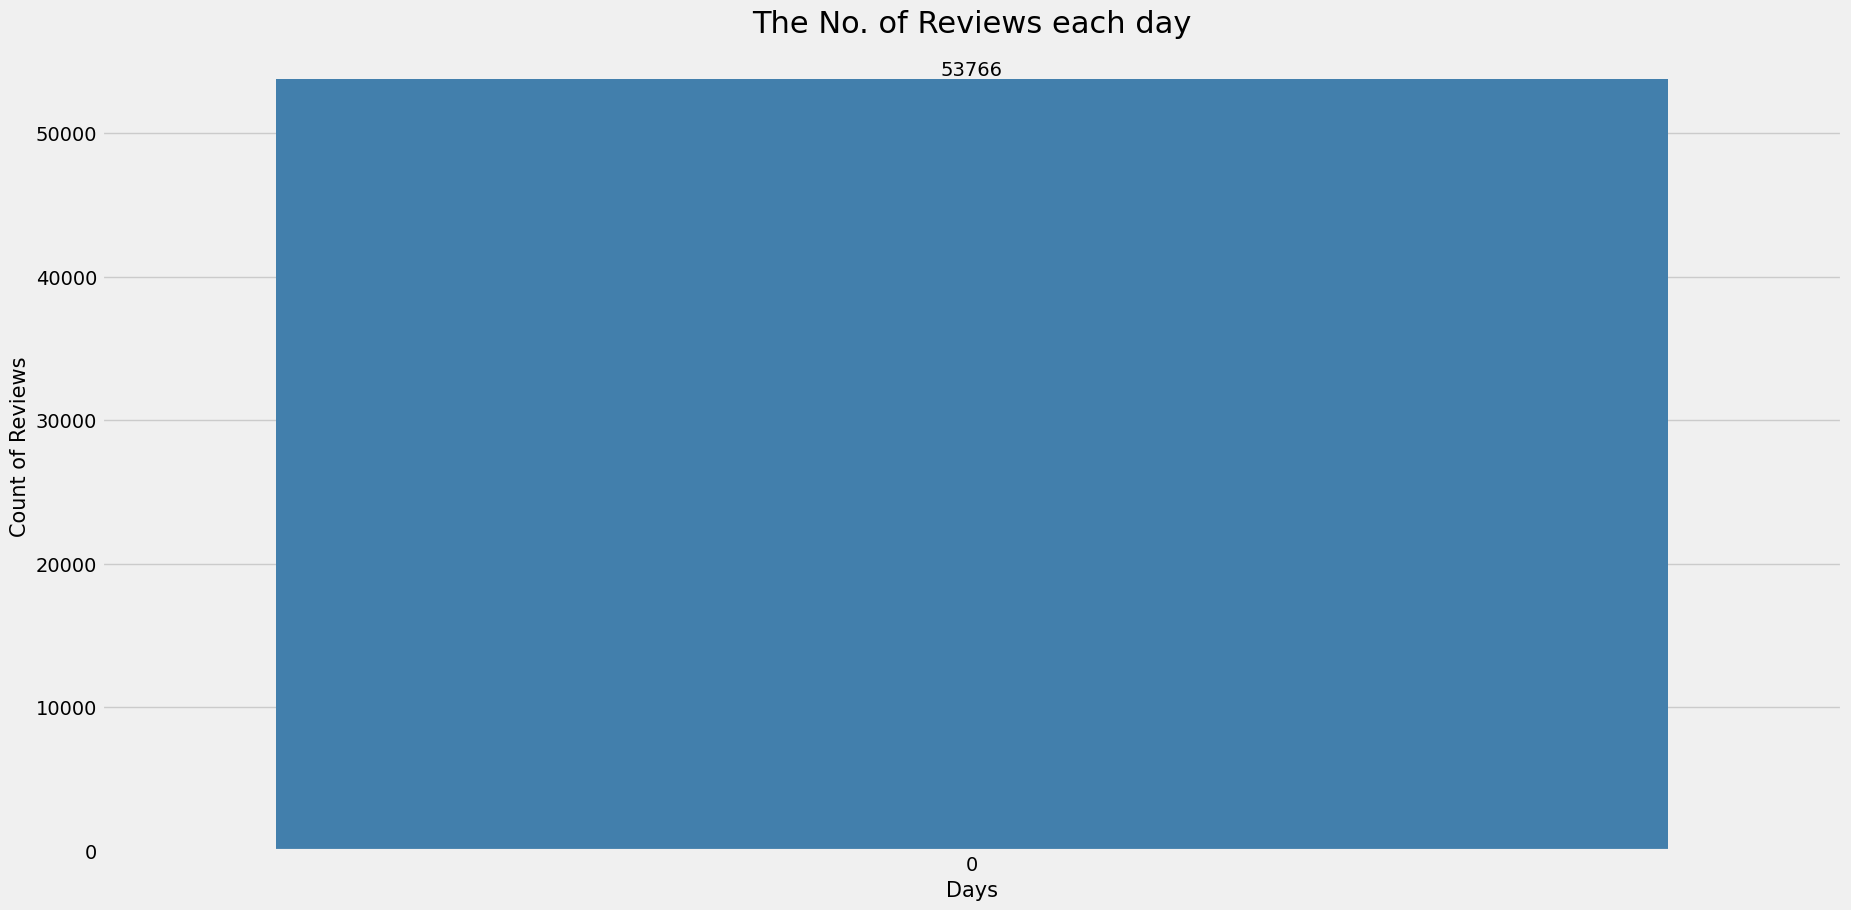

In [62]:
plt.figure(figsize=(20,10))
sns_=sns.countplot(df['day'], palette ='tab20c')

for i in sns_.containers:
    sns_.bar_label(i)
    
plt.title('The No. of Reviews each day', fontsize = 22)
plt.xlabel('Days', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
plt.show()

In [63]:
from textblob import TextBlob

ModuleNotFoundError: No module named 'textblob'

In [64]:
df['review'].head()

0    "I&#039;ve tried a few antidepressants over th...
1    "My son has Crohn&#039;s disease and has done ...
2                        "Quick reduction of symptoms"
3    "Contrave combines drugs that were used for al...
4    "I have been on this birth control for one cyc...
Name: review, dtype: object

In [65]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.polarity

def get_sentiment_label(text):
    blob = TextBlob(text)
    if blob.polarity > 0:
        result = 'positive'
    elif blob.polarity < 0:
        result = 'negative'
    else:
        result = 'neutral'
    return result